In [1]:
# Configuration related preprocessing step before mounting the drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} </dev/null 2>&1 | grep URL
vcode=getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
The system cannot find the path specified.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'google.colab'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!ls "/content/drive/My Drive"

'Bayesian Classification_reference_slides.gdoc'
'CC1 501 - Group 7 (Univariate Linear Regression) GEOFFREY SAGWE OMBUI.docx'
'CC1 501 - Group 7 (Univariate Linear Regression).pdf'
'CCI 501 - Group Assigment.docx'
'CCI 501 Lecture (2020-12-03 at 06:37 GMT-8)'
 Classroom
'Colab Notebooks'
 Decision_tree_reference_slides.gdoc
 decision_trees_formalities.gdoc
 Decision_Trees.gdoc
 face_mask
'Face mask'
 Face_Mask_Detection.ipynb
 Generating_Parse_Trees.ipynb
 haarcascade_frontalface_default.xml
 IMG_20210123_154803_573.jpg
'Lecture 10 - NeuralNetworks.handouts.gdoc'
'Lecture 1B.gdoc'
'Lecture 2A Main Hypothesis Testing Lecture.gslides'
'Lecture 2B Support.gdoc'
'lecture 3A Regression Analysis.gslides'
'Lecture 3B FORECASTING.gslides'
'Lecture 3B Regression analysis.gdoc'
'Lecture 3 - Introduction to Unsupervised Learning (1).gdoc'
'Lecture 3 - Introduction to Unsupervised Learning.gdoc'
'Lecture 4A LINEAR PROGRAMMING.gslides'
'Lecture 4B Business Optimisation.gslides'
'Lecture 5A  Decision

In [3]:
# Data Pre-processing
import os

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/Projects/")
face_mask = 'face_mask'
Data_Dir = os.listdir(face_mask)
print(Data_Dir)

['without_mask', 'with_mask']


In [4]:
# Import necessary libraries
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows, img_cols = 112, 112

images = []
labels = []

for category in Data_Dir:
  folder_path = os.path.join(face_mask, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)

    try:
      #Converting the image into gray scale
      grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      #resizing the gray scaled image into size 56*56 in order to keep size of the images consistent
      resized_img = cv2.resize(grayscale_img,(img_rows, img_cols))
      images.append(resized_img)
      labels.append(category)
    # Exception Handling in case any error occurs
    except Exception as e:
      print('Exception:', e)
images = np.array(images)/255.0
images = np.reshape(images, (images.shape[0], img_rows, img_cols, 1)) 

# Perform one hot encoding on the labels since the label are textual form
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size = 0.25, random_state = 0)

In [5]:
#Build Convolutional Neural Network(CNN) Classfication Model

# Import Necessary Keras Libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

# Define model parameters
num_classes = 2
batch_size = 32

# Build CNN model using Sequential API
model = Sequential()

# First layer group containing Convolution, Relu and MaxPooling layers
model.add(Conv2D(64, (3,3), input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Second layer group containing Convolution, Relu and MaxPooling layers
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and DRopout Layer to Stack output Convolutions above as well as cater overfitting
model.add(Flatten())
model.add(Dropout(0.5))

# Softmax Classifier
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [6]:
# Train the Model

from keras.optimizers import Adam

epochs = 60

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
fitted_model = model.fit(train_X, train_y, epochs = epochs, validation_split = 0.25)

Epoch 1/60
4/4 [==============================] - 33s 232ms/step - loss: 0.9395 - accuracy: 0.5162 - val_loss: 2.7247 - val_accuracy: 0.5135
Epoch 2/60
4/4 [==============================] - 0s 34ms/step - loss: 2.0035 - accuracy: 0.4874 - val_loss: 0.7375 - val_accuracy: 0.4865
Epoch 3/60
4/4 [==============================] - 0s 34ms/step - loss: 0.7164 - accuracy: 0.5072 - val_loss: 0.6832 - val_accuracy: 0.5405
Epoch 4/60
4/4 [==============================] - 0s 33ms/step - loss: 0.6459 - accuracy: 0.7076 - val_loss: 0.6497 - val_accuracy: 0.5135
Epoch 5/60
4/4 [==============================] - 0s 34ms/step - loss: 0.5407 - accuracy: 0.7773 - val_loss: 0.6056 - val_accuracy: 0.6486
Epoch 6/60
4/4 [==============================] - 0s 34ms/step - loss: 0.4360 - accuracy: 0.8350 - val_loss: 0.5085 - val_accuracy: 0.7838
Epoch 7/60
4/4 [==============================] - 0s 33ms/step - loss: 0.3626 - accuracy: 0.8784 - val_loss: 0.5825 - val_accuracy: 0.6757
Epoch 8/60
4/4 [=========

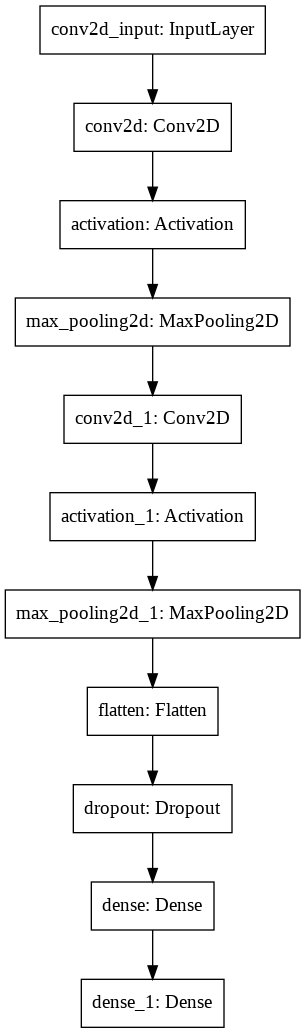

In [8]:
# Plot the Model Architecture
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'face_mask_detection_architecture.png')

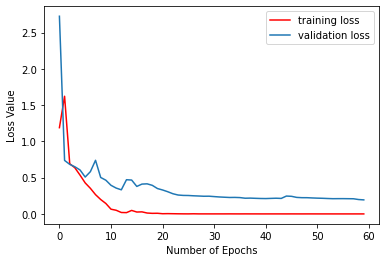

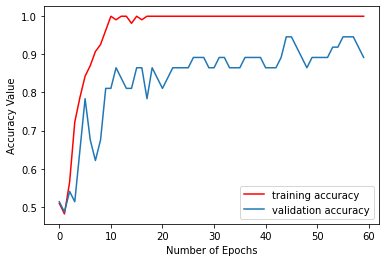

In [9]:
# Plotting the Training Loss and Accuracy

from matplotlib import pyplot as plt
# Plot Training and Validation Loss
plt.plot(fitted_model.history['loss'], 'r', label = 'training loss')
plt.plot(fitted_model.history['val_loss'], label = 'validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(fitted_model.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(fitted_model.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [10]:
# Save or Serialize the Model

# Save or Serialize the model with the name Face_Mask_Detection_System
model.save('face_mask_detection_system.h5')

In [11]:
# Import necessary libraries

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import tkinter
from tkinter import messagebox
import smtplib
import time # Provides time-related functions
import cv2 # OpenCV library
import os
import matplotlib
matplotlib.use('Agg')

import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt

# Initialize Tkinter
root = tkinter.Tk()
root.withdraw()

# Load trained deep learning model
model = load_model('face_mask_detection_system.h5')

# Classifier to detect face
face_det_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Dictionaries containing details of wearing Mask and color of rectangle around face
# Green and if not wearing mask then color of rectangle around face would be red.

text_dict = {0:'Mask ON',1:'No Mask'}
rect_color_dict = {0:(0,255,0),1:(0,0,255)}

SUBJECT = "Subject"
TEXT = "One Visitor violated Face Mask Policy. See in the camera to recognize user A person has been detected without a face mask in the Hotel Lobby area. Please Alert the authorities.Photo Captured:"

# While Loop to continuosly detect camera feed

print("[INFO] starting video stream....")
vs = VideoStream(src=0).start() 

while(True):

  ret, img = vid_source.read()
  grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_det_classifier.detectMultiScale(grayscale_img, 1.3,5)

  for (x,y,w,h) in faces:

    face_img = grayscale_img[y:y+w,x:x+w]
    resized_img = cv2.resize(face_img,(112,112))
    normalized_img = resized_img/255.0
    reshaped_img = np.reshape(normalized_img,(1,112,112,1))
    result = model.predict(reshaped_img)

    label = np.argmax(result, axis = 1)[0]

    cv2.rectangle(img,(x,y),(x+w,y+h),rect_color_dict[label],2)
    cv2.rectangle(img,(x,y-40),(x+w,y),rect_color_dict[label],-1)
    cv2.putText(img,text_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)

    # If label = 1 then it means wearing No Mask and 0 means wearing Mask
    if (label == 1):
       # Throw a Warning Message to tell user to wear mask if not wearing one.
       # Open and No Access will be given He/She wears the mask
       messagebox.showwarning("Warning","Access Denied. Please wear a Face Mask")

       # Send an Email to the Administrator if access denied/user not wearing face mask
       message = 'Subject:{}\n\n{}'.format(SUBJECT,TEXT)
       mail = smtplib.SMTP('smtp.gmail.com',587)
       mail.ehlo()
       mail.starttls()
       mail.login('sagweombui@students.uonbi.ac.ke')
       mail.sendmail('sagweombui@students.uonbi.ac.ke','sagweombui@students.uonbi.ac.ke',message)
       mail.close
    else:
      pass
      break

    # Display the frame using OpenCV
    cv2.imshow("Frame", frame)

    # Clear the stream in preparation for the next frame
    raw_capture.truncate(0)     
    key = cv2.waitKey(1)

    if(key==27):
      break
cv2.destroyAllWindows()
source.release()      




no display found. Using non-interactive Agg backend


TclError: ignored